#**Fusão Multimodal**
Neste Notebook são apresentados operadores de fusão prévia de características aplicados a características de médio nível semântico de diferentes modalidades. 

Ao fazer a fusão no médio nível, em vez de fazer no baixo nível, consegue-se explorar melhor a semântica latente contida nos dados. O resultado esperado é uma melhora de eficácia quando as representações fundidas são utilizadas em tarefas computacionais (como classificação, recomendação, etc.).

Diferente das representações obtidas no processo de **Enriquecimento Semântico**, que são representações unimodias (ou somente visuais ou somente aurais), aqui a representação obitada é um histograma com informações de mais de uma modalidades - **multimodal**. 


#Preparação do ambiente do Notebook





**Instalando Dependências**

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt 


**Acesso ao Drive - para armazenamento de Arquivos**

O *pathname* precisa ser personalizado com o Drive do usuário deste Notebook. Atenção: alguns *pathnames* podem estar em Inglês enquanto outros em Português - verifique o seu caso. Crie um pasta no **seu** Drive onde os arquivos serão armazenados. Neste exemplo tal pasta é "MBA_Curso14_Dados".

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
cd '/content/drive/My Drive/MBA_Curso14_Dados/'

/content/drive/My Drive/MBA_Curso14_Dados


#<h1>Operadores de Fusão Prévia Aplicados em Representações de Médio Nível Semântico</h1>

Os operadores de fusão são práticos, simples de implementar e computacionalmente baratos. Beserra et al. (2020) (veja referência abaixo) demonstram que aplicados em médio nível semântico possuem eficácia equiparável a métodos recentes de fusão mais complexos.

Antonio A. R. Beserra, Rodrigo M. Kishi, and Rudinei Goularte. 2020. Evaluating Early Fusion Operators at Mid-Level Feature Space. In Proceedings of the Brazilian Symposium on Multimedia and the Web (WebMedia '20). Association for Computing Machinery, New York, NY, USA, 113–120. DOI:https://doi.org/10.1145/3428658.3431079

In [4]:
#Operador de Fusão Soma 
def sumOperator (visual, aural):
    sumFused = []
    
    for i in range(len(visual)):
      a = aural[i]
      v = visual[i]
      sumFused.append(aural[i]+visual[i])     

    return (sumFused)

#Operador de Fusão Máximo 
def maxOperator(visual, aural):
    maxFused = visual.copy()
    qtdTomadas = len(visual)
    tamHist = len(visual[0])

    for tomada in range(qtdTomadas):
        for i in range (tamHist):
            if (visual[tomada][i] < aural[tomada][i]):
                maxFused[tomada][i] = aural[tomada][i]
    return (maxFused)

#Script para a geração de histograma multimodal 
Será gerado um  histograma para cada vídeo da 
base, sendo que os histogramas serão armazenados em uma lista ("multiModalHistogram") e a lista será salva em arquivo. Cada histograma constitui uma **representação multimodal** (visual e aural nesse caso) de um vídeo, fundidas por meio de um operador específico.

O arquivo poderá ser usado posteriormente para recuperar a lista e usar os histogramas que representam os vídeos em tarefas ou aplicações computacionais.

Multimodal:  [1.300e+01 7.060e+02 1.410e+02 4.500e+01 6.000e+01 1.015e+03 1.080e+02
 2.310e+02 3.040e+02 0.000e+00 2.650e+02 3.040e+02 1.000e+00 5.200e+01
 0.000e+00 6.800e+01 3.400e+01 5.500e+01 3.200e+01 7.700e+01 4.200e+01
 2.510e+02 7.700e+01 3.250e+02 0.000e+00 8.790e+02 3.000e+00 3.000e+00
 3.700e+01 8.250e+02 2.640e+02 2.180e+02 1.100e+01 1.288e+03 6.500e+01
 1.180e+02 8.000e+00 2.900e+01 1.529e+03 6.000e+01 6.420e+02 8.400e+02
 0.000e+00 1.400e+01 1.050e+02 3.054e+03 5.300e+01 6.000e+00 9.000e+01
 0.000e+00 5.550e+02 1.600e+02 7.400e+01 1.240e+03 1.379e+03 2.700e+01
 4.000e+00 3.400e+01 3.000e+00 2.804e+03 1.600e+01 5.610e+02 5.400e+01
 5.800e+01 2.326e+03 5.600e+01 7.100e+01 1.129e+03 1.700e+01 1.310e+02
 0.000e+00 1.810e+02 6.240e+02 4.000e+01 9.300e+01 0.000e+00 0.000e+00
 3.800e+01 2.400e+01 2.500e+01 9.000e+00 2.000e+01 4.000e+00 1.599e+03
 0.000e+00 1.990e+02 2.700e+01 1.038e+03 9.900e+02 4.900e+02 7.000e+01
 2.800e+01 6.100e+01 5.300e+01 1.000e+00 4.000e+00 3.270e+02 1.5

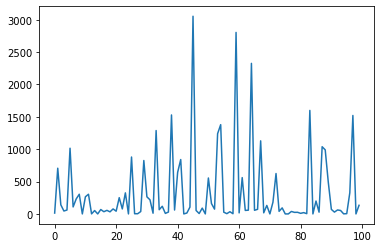

In [5]:
visualHistogram = []

#Recuperando representação monomodal visual previamente computada e salva em arquivo
#O número ao fim do nome do arquivo indica a dimesão de cada histograma, que vem
#do tamanho do dicionário usado para gerar a representação monomodal.
with open('./histogramas2/visual_histogram_100_cosine.arq', 'rb') as arq1:
    visualHistogram = pickle.load(arq1)

#Idem para a reprensentação monomodal aural.
auralHistogram = []
with open('./histogramas2/aural_histogram_100_cosine.arq', 'rb') as arq2:
    auralHistogram = pickle.load(arq2)

#Aplicando o operador de fusão.
multiModalHistogram = maxOperator(visualHistogram, auralHistogram)

#Salvado  os histogramas em arquivo
#A pasta "histogramas" deve existir dentro de "MBA_Curso14_Dados"
with open('./histogramas2/mm_max_histogram_100_cosine.arq', 'wb') as arq_mm:
    pickle.dump(multiModalHistogram, arq_mm)

#Imprimindo o histograma multimodal do 1o vídeo da base
print("Multimodal: ", multiModalHistogram[0])

plt.plot(multiModalHistogram[0])
plt.show()
